In [94]:
import glob
import numpy as np
import pandas as pd
import clima_anom as ca
import cartopy
import cartopy.feature as feature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from netCDF4 import Dataset

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [95]:
Ano = '2018'
Mes = '03'
acumm = '15min'
Region = 'SA'

In [96]:
data_dir = '../List/List_'+ acumm + '/*.csv'
lista_GLM = glob.glob(data_dir)
lista_GLM = sorted(lista_GLM)

In [97]:
for t in range(len(lista_GLM)): #len(lista_GLM)

    name = lista_GLM[t]
    name_out = lista_GLM[t].split('/')[3].replace("List", "Flash")
    Dia = name_out.split('_')[4]
    Hora = name_out.split('_')[5]
    Minu_s_s = name_out.split('_')[6]

    lista_files = pd.read_csv(name)

    GLM_dia = []
    GLM_hora = []
    GLM_min = []
    GLM_lon = []
    GLM_lat = []

    for n in range(len(lista_files)):

        name_v1 = '/mnt/Data/' + lista_files['File'][n]
        data = Dataset(name_v1,mode = 'r')

        lat = data['flash_lat']
        lon = data['flash_lon']

        GLM_lat = np.concatenate(([GLM_lat,lat]), axis=0)
        GLM_lon = np.concatenate(([GLM_lon,lon]), axis=0)

        GLM_flash = pd.DataFrame({'dia':Dia,'hora':Hora,'minuto':Minu_s_s,'Lat':GLM_lat,'Lon':GLM_lon})

        if Region == 'SA':
            out1 = GLM_flash[(GLM_flash['Lon'] > -85) & (GLM_flash['Lon'] < -30 )]
            out2 = out1[(out1['Lat'] > -45) & (out1['Lat'] < 10 )]

        if Region == 'SaoPaulo':
            out1 = GLM_flash[(GLM_flash['Lon'] > -50) & (GLM_flash['Lon'] < -44 )]
            out2 = out1[(out1['Lat'] > -25) & (out1['Lat'] < -20 )]

    salida = '/mnt/Data/Data/GLM/SA/Point/'+Ano+'/'+Mes+'/' + name_out
    export_csv = out2.to_csv(salida, index = None, header=True)  
    print(salida)

/mnt/Data/Data/GLM/SA/Point/2018/03/Flash_15min_2018_03_01_00_00_14.csv
/mnt/Data/Data/GLM/SA/Point/2018/03/Flash_15min_2018_03_01_00_15_29.csv
/mnt/Data/Data/GLM/SA/Point/2018/03/Flash_15min_2018_03_01_00_30_44.csv
/mnt/Data/Data/GLM/SA/Point/2018/03/Flash_15min_2018_03_01_00_45_59.csv
/mnt/Data/Data/GLM/SA/Point/2018/03/Flash_15min_2018_03_01_01_00_14.csv
/mnt/Data/Data/GLM/SA/Point/2018/03/Flash_15min_2018_03_01_01_15_29.csv
/mnt/Data/Data/GLM/SA/Point/2018/03/Flash_15min_2018_03_01_01_30_44.csv
/mnt/Data/Data/GLM/SA/Point/2018/03/Flash_15min_2018_03_01_01_45_59.csv
/mnt/Data/Data/GLM/SA/Point/2018/03/Flash_15min_2018_03_01_02_00_14.csv
/mnt/Data/Data/GLM/SA/Point/2018/03/Flash_15min_2018_03_01_02_15_29.csv
/mnt/Data/Data/GLM/SA/Point/2018/03/Flash_15min_2018_03_01_02_30_44.csv
/mnt/Data/Data/GLM/SA/Point/2018/03/Flash_15min_2018_03_01_02_45_59.csv
/mnt/Data/Data/GLM/SA/Point/2018/03/Flash_15min_2018_03_01_03_00_14.csv
/mnt/Data/Data/GLM/SA/Point/2018/03/Flash_15min_2018_03_01_03_15

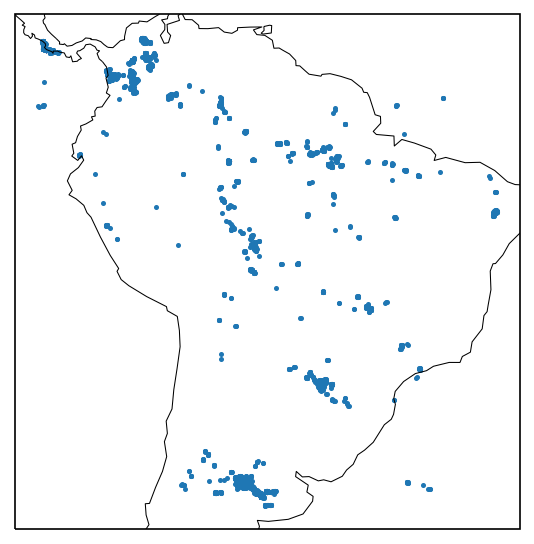

In [99]:
lat = out2['Lat']
lon = out2['Lon']

levels = np.arange(0,34,2)
cmap = plt.cm.Spectral_r

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,10),dpi=150)
gs = gridspec.GridSpec(2,2)

ax1 = plt.subplot(gs[0, 0:], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.scatter(lon, lat, s=2)